# Author : Akshay Kumar

## Task 1: Prediction using Supervised ML


## GRIP @ The Spark Foundation 

In [2]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [37]:
#reading the data 
data = pd.read_csv("http://bit.ly/w-data")
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#checking if there is any null value is present or not 
data.isnull ==True

False

## There is no null value inthe datset so, now we can visualize our data 

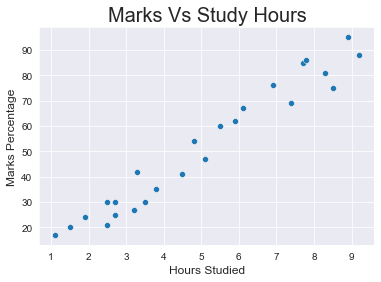

In [11]:
sns.set_style("darkgrid")
sns.scatterplot(y=data["Scores"],x=data["Hours"])
plt.title("Marks Vs Study Hours", size=20)
plt.ylabel("Marks Percentage", size =12)
plt.xlabel("Hours Studied", size = 12)
plt.show()

## From the above scatter plot there looks to be correlation between "marks percentage" and "hour studies ", Lets plot a regression line to confirm the correlation

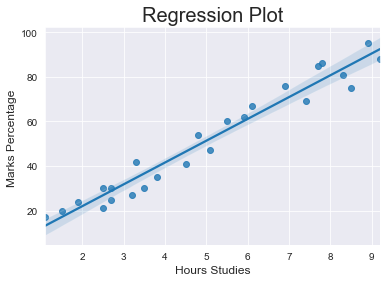

In [13]:
sns.regplot(x=data["Hours"],y= data["Scores"])
plt.title("Regression Plot", size =20)
plt.ylabel("Marks Percentage ", size= 12)
plt.xlabel("Hours Studies", size = 12)
plt.show()

###   Its is comfirmed that the varibales are positively correlated


# Training the Model


## 1) Splitting the data


In [29]:
# Defining the X and Y from the Data
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values

#Splitting the Data in two
train_X , val_X , train_y,val_y = train_test_split(X,y, random_state = 0)

## Fitting the Data into the Model


In [30]:
regression = LinearRegression()
regression.fit(train_X ,train_y)
print("-------- Model Trained---------")


-------- Model Trained---------


###  ----------Model Trained-------------


# Predicting the Percentage of Marks



In [31]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({"Hours":[i[0] for i in val_X], "Predicted Marks ":[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Marks with the Actual Marks 

In [32]:
compare_scores = pd.DataFrame({"Actual Makrs": val_y, "Predicted makrs": pred_y})
compare_scores

,Actual Makrs,Predicted makrs
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#  Visually Comparing the Predicated marks with the Actual marks



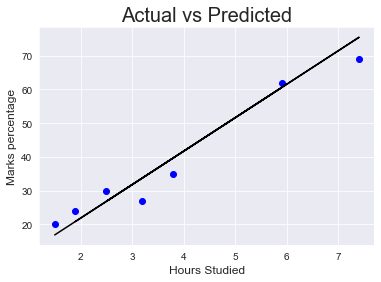

In [33]:
plt.scatter(x = val_X,y = val_y, color ="blue")
plt.plot(val_X, pred_y, color = "Black")
plt.title("Actual vs Predicted", size = 20)
plt.ylabel("Marks percentage", size =12)
plt.xlabel("Hours Studied", size = 12)
plt.show()

# Evaluating the model


In [34]:
#Calculating the accuracy of the model
print("Mean absolute error:", mean_absolute_error(val_y,pred_y))


Mean absolute error: 4.130879918502482


### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model ar very less


## What will be the predict score of as Student if he/she studies for 9.25 hrs /day?


In [36]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))
      

Score = 93.893


### According to the regression model if as student studies for 9.25 hrs/day then he/she is likely to score 93.89 marks